In [13]:
from pathlib import Path
import numpy as np
import RCP_analysis as rcp

%matplotlib inline
from matplotlib import pyplot as plt

# ---------- CONFIG ----------
REPO_ROOT = Path().resolve().parents[0]
PARAMS    = rcp.load_experiment_params(REPO_ROOT / "config" / "params.yaml", repo_root=REPO_ROOT)

SESSION_LOC = (Path(PARAMS.data_root) / Path(PARAMS.location)).resolve()
OUT_BASE  = SESSION_LOC / "results"; OUT_BASE.mkdir(parents=True, exist_ok=True)
METADATA_ROOT = SESSION_LOC / "Metadata"; METADATA_ROOT.mkdir(parents=True, exist_ok=True)
METADATA_CSV  = METADATA_ROOT / f"{Path(PARAMS.session)}_metadata.csv"

# ---------- checkpoints / inputs ----------
ALIGNED_ROOT = OUT_BASE / "checkpoints" / "Aligned"
BEHAV_ROOT   = OUT_BASE / "checkpoints" / "behavior" / "baseline_concat"
RATES_DIR = BEHAV_ROOT / "rates_from_curated"

RATES_ALL_PATH = '/home/bryan/mnt/cullen/Current Project Databases - NHP/2025 Cerebellum prosthesis/Nike/NRR_RW005/results/checkpoints/behavior/baseline_concat/rates_from_curated/rates_from_curated__UA_A__Depth43__ALL.npz'

with np.load(RATES_ALL_PATH, allow_pickle=True) as z:
    cam0      = z.get("beh_cam0", np.zeros((0,0), np.float32)).astype(float)
    intan_win = z["intan_rate_win"].astype(float) if "intan_rate_win" in z.files else np.zeros((0,0,0), float)
    ua_win    = z["ua_rate_win"].astype(float)    if "ua_rate_win"    in z.files else np.zeros((0,0,0), float)
    intan_t     = z["intan_t_rel_ms"].astype(float)  if "intan_t_rel_ms"  in z.files else np.arange(0.0)
    ua_t     = z["ua_t_rel_ms"].astype(float)  if "ua_t_rel_ms"  in z.files else np.arange(0.0)
    
KIN_PATH = '/home/bryan/mnt/cullen/Current Project Databases - NHP/2025 Cerebellum prosthesis/Nike/NRR_RW005/results/checkpoints/behavior/baseline_concat/baseline_UA_A_Depth43_cam0.npz'
with np.load(KIN_PATH, allow_pickle=True) as z:
    cam0      = z.get("beh_cam0", np.zeros((0,0), np.float32)).astype(float)
    cam1      = z.get("beh_cam1", np.zeros((0,0), np.float32)).astype(float)

In [14]:
ua_win.shape

(39, 128, 61)

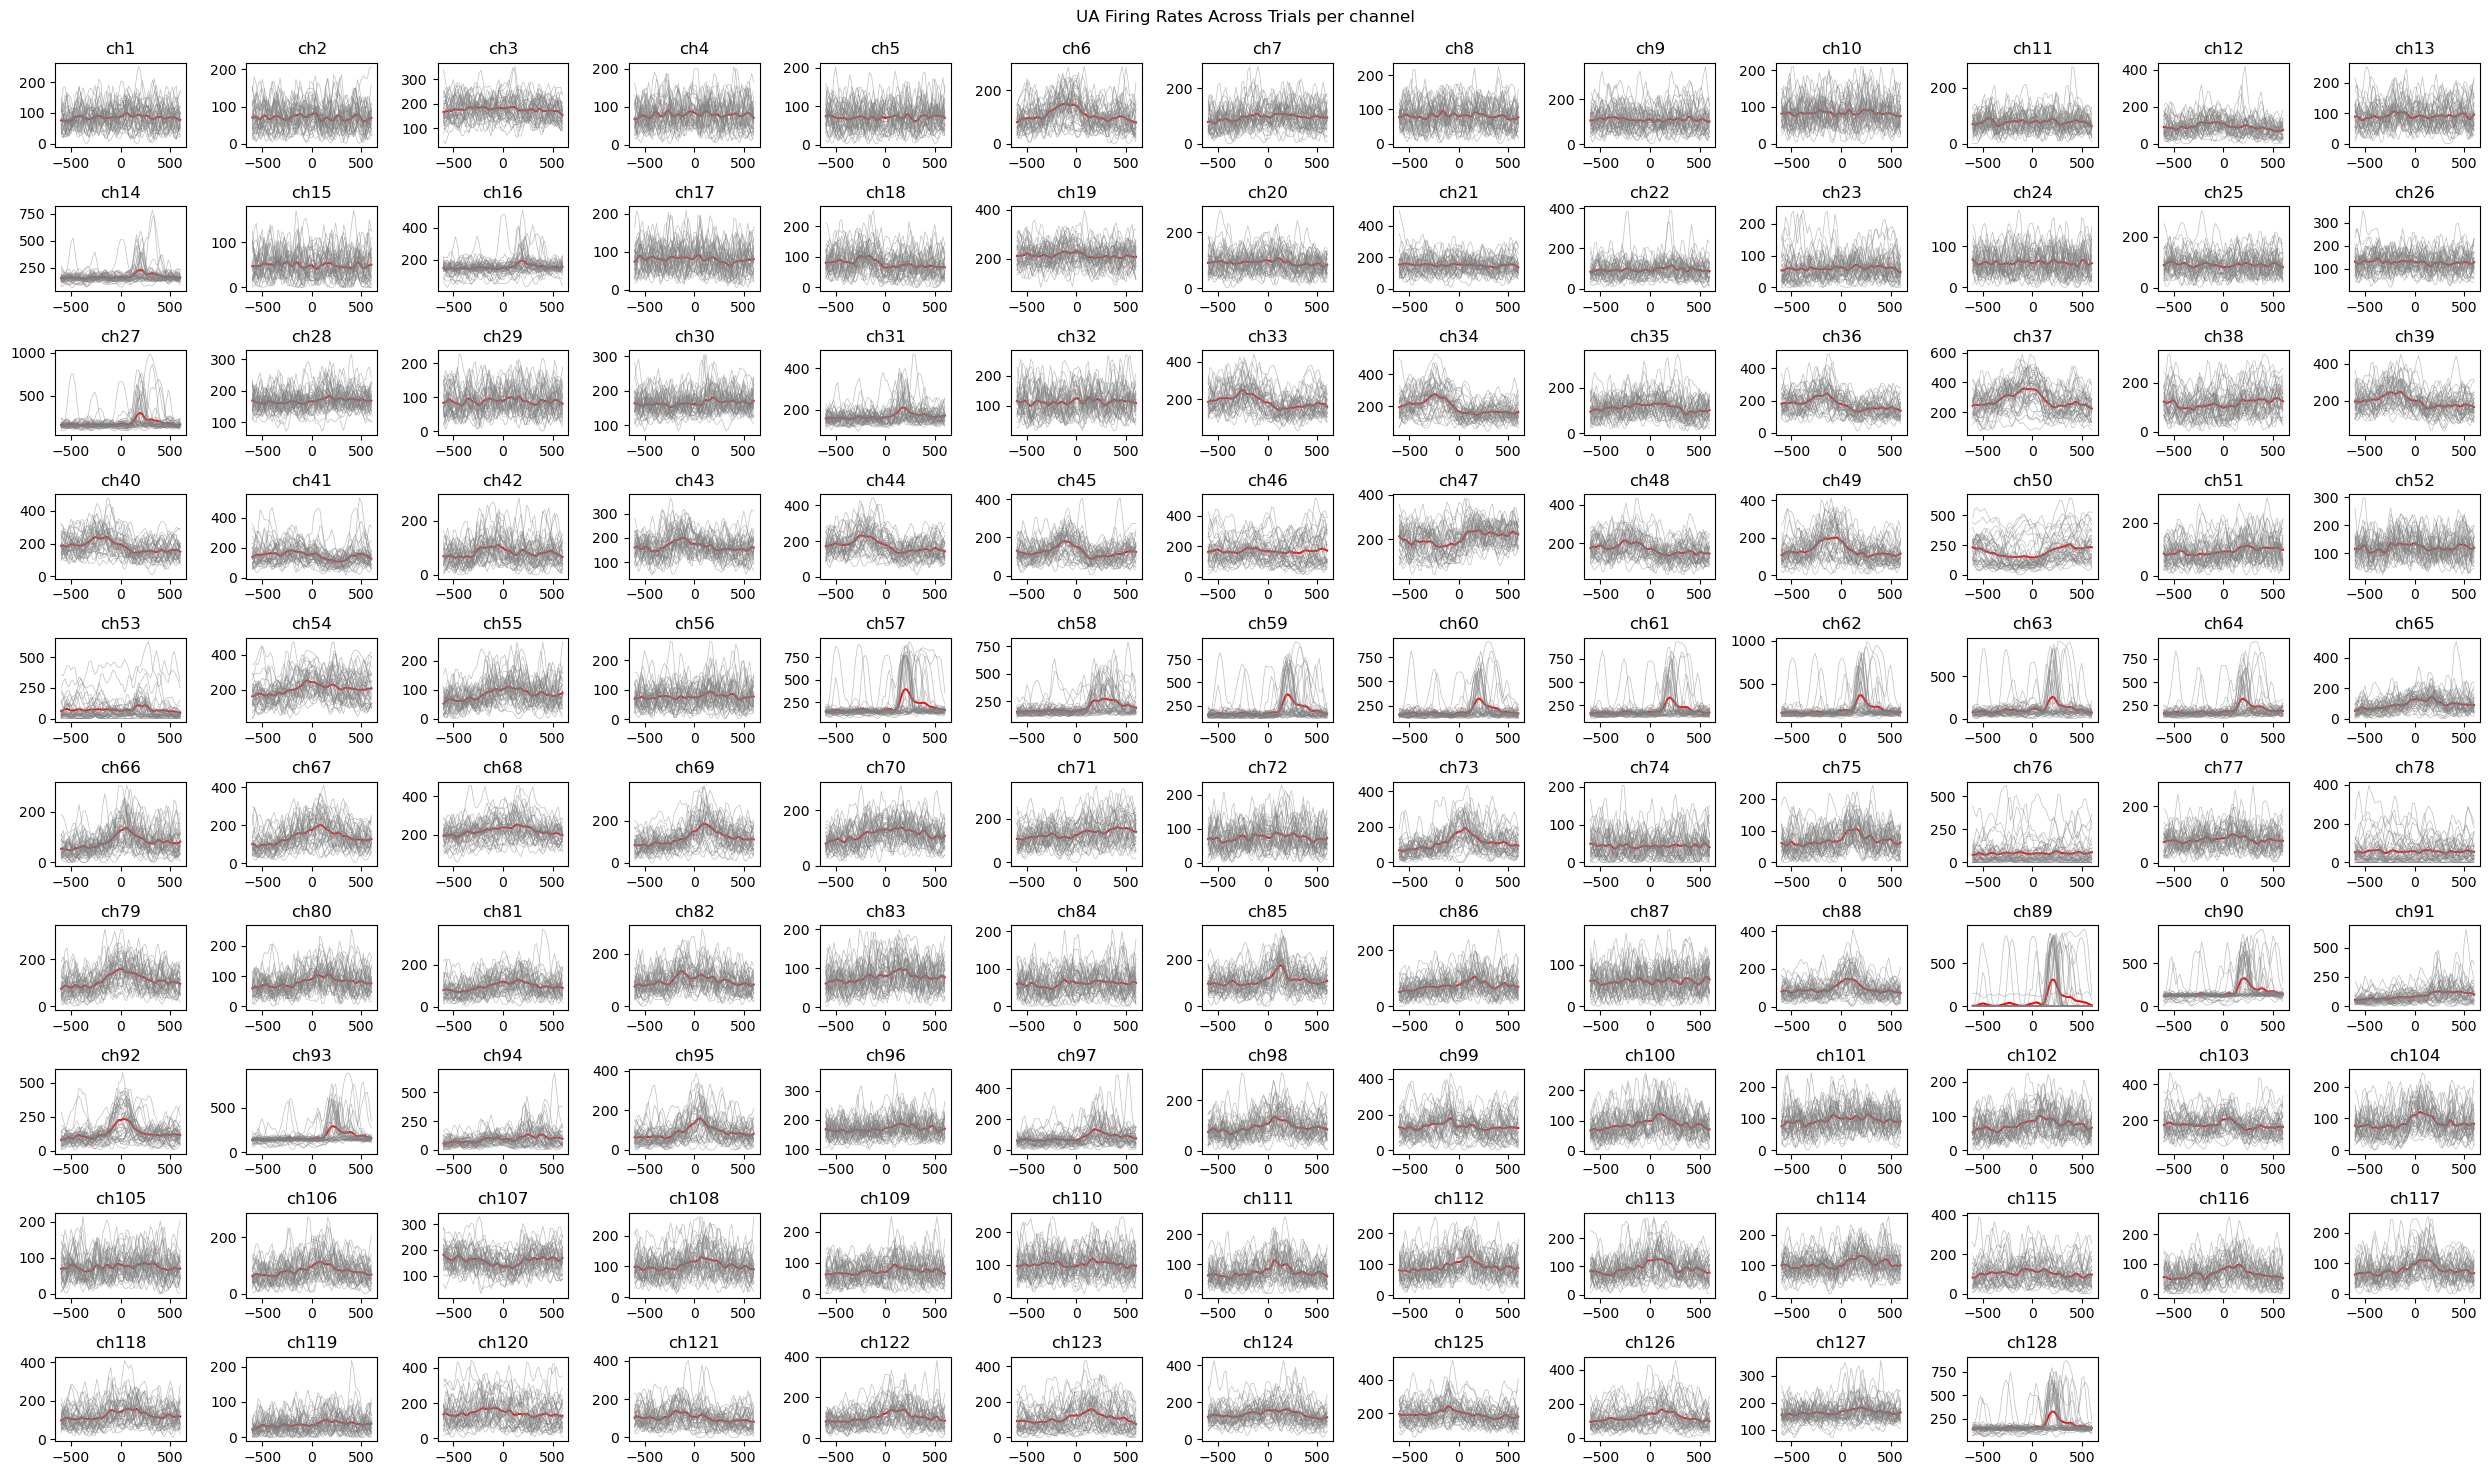

In [15]:
plt.figure(figsize=(25, 15))
for ch_select in range(128):
    plt.subplot(10,13, ch_select+1)
    plt.plot(ua_t, np.nanmean(ua_win[:, ch_select, :], axis = 0).T,color="red")
    plt.plot(ua_t, ua_win[:, ch_select, :].T,color="gray",linewidth=0.5,alpha=0.5)
    plt.title("ch" + str(ch_select + 1))
    
plt.suptitle("UA Firing Rates Across Trials per channel\n")
plt.tight_layout()

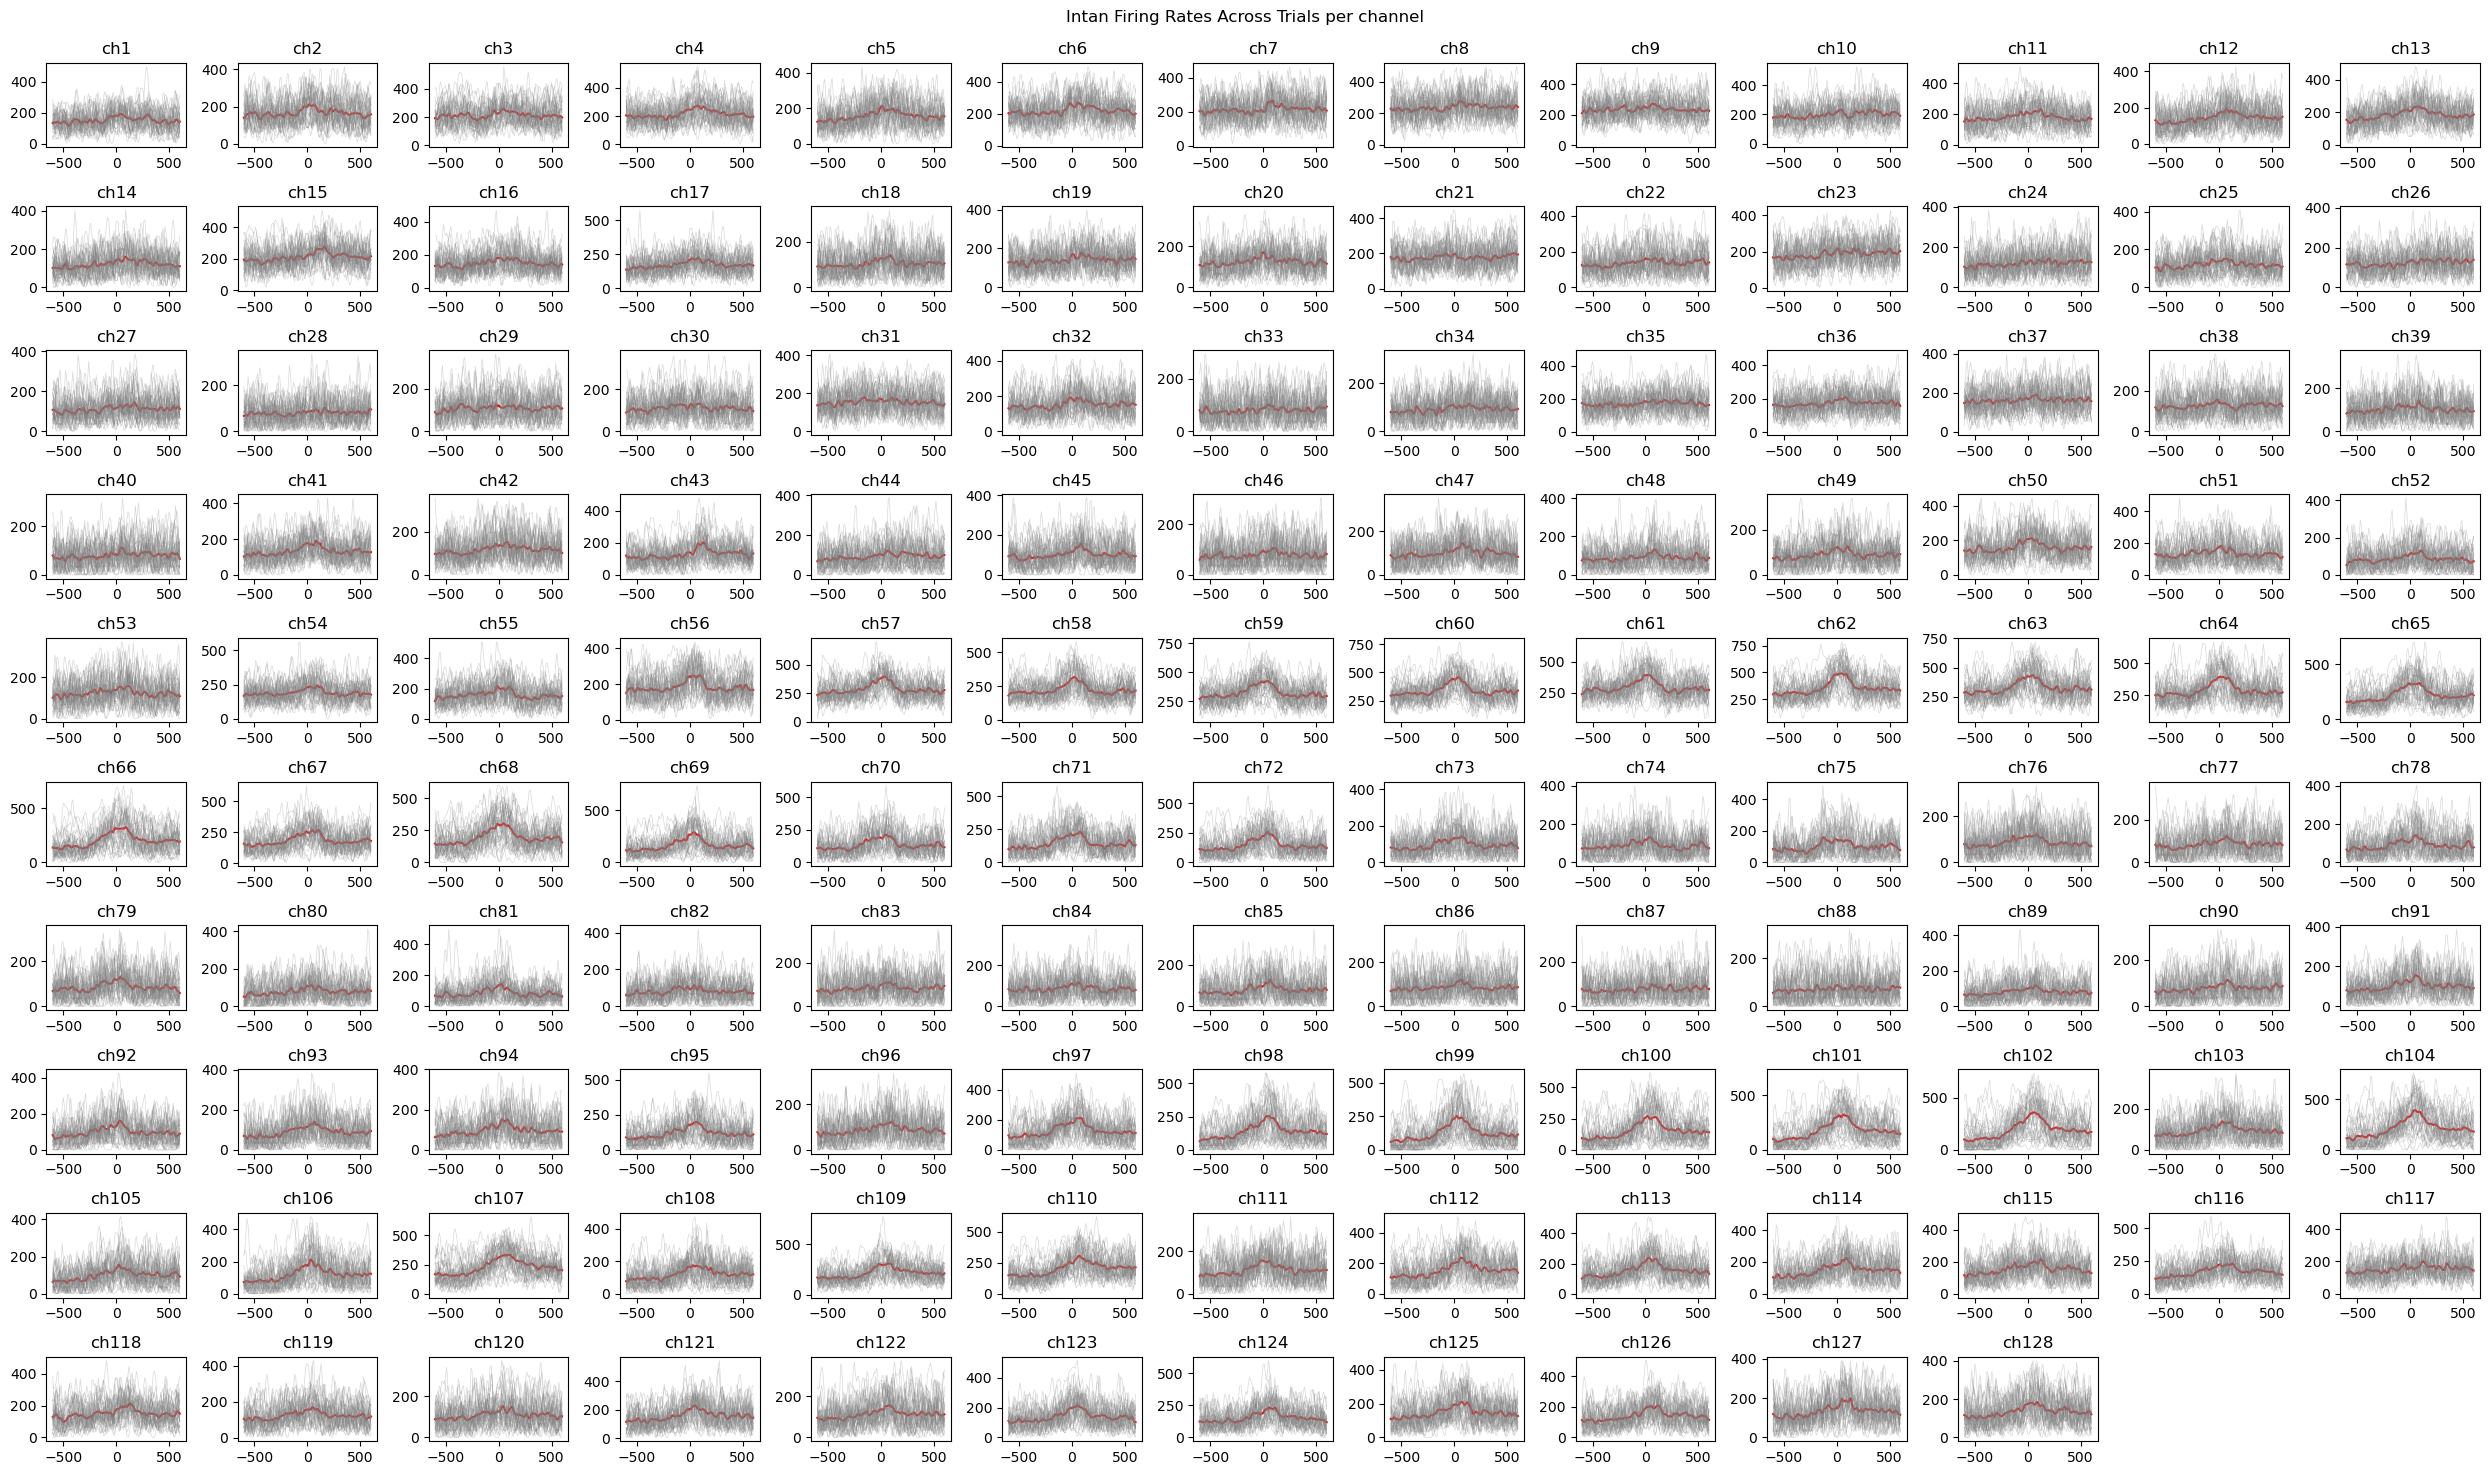

In [16]:
plt.figure(figsize=(25, 15))
for ch_select in range(128):
    plt.subplot(10, 13, ch_select+1)
    plt.plot(intan_t, np.nanmean(intan_win[:, ch_select, :], axis = 0).T,color="red")
    plt.plot(intan_t, intan_win[:, ch_select, :].T,color="gray",linewidth=0.5,alpha=0.3)
    plt.title("ch" + str(ch_select + 1))
    
plt.suptitle("Intan Firing Rates Across Trials per channel\n")
plt.tight_layout()


In [17]:
RATES_ALL_PATH = '/home/bryan/mnt/cullen/Current Project Databases - NHP/2025 Cerebellum prosthesis/Nike/NRR_RW005/results/checkpoints/Aligned/aligned__NRR_RW005_251017_143721__Intan_003__BR_003.npz'

with np.load(RATES_ALL_PATH, allow_pickle=True) as z:
    intan_win = z["intan_rate_hz"].astype(float) if "intan_rate_hz" in z.files else np.zeros((0,0,0), float)
    ua_win    = z["ua_rate_hz"].astype(float)    if "ua_rate_hz"    in z.files else np.zeros((0,0,0), float)
    intan_t     = z["intan_t_ms_aligned"].astype(float)  if "intan_t_ms_aligned"  in z.files else np.arange(0.0)
    ua_t     = z["ua_t_ms_aligned"].astype(float)  if "ua_t_ms_aligned"  in z.files else np.arange(0.0)

In [18]:
ua_win.shape

(128, 14612)

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

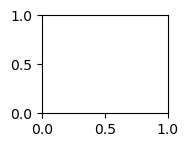

In [19]:
plt.figure(figsize=(25, 15))
for ch_select in range(128):
    plt.subplot(10,13, ch_select+1)
    plt.plot(ua_t, np.nanmean(ua_win[:, ch_select, :], axis = 0).T,color="red")
    plt.plot(ua_t, ua_win[:, ch_select, :].T,color="gray",linewidth=0.5,alpha=0.5)
    plt.title("ch" + str(ch_select + 1))
    
plt.suptitle("UA Firing Rates Across Trials per channel\n")
plt.tight_layout()

In [ ]:
plt.figure(figsize=(25, 15))
for ch_select in range(128):
    plt.subplot(10, 13, ch_select+1)
    plt.plot(intan_t, np.nanmean(intan_win[:, ch_select, :], axis = 0).T,color="red")
    plt.plot(intan_t, intan_win[:, ch_select, :].T,color="gray",linewidth=0.5,alpha=0.3)
    plt.title("ch" + str(ch_select + 1))
    
plt.suptitle("Intan Firing Rates Across Trials per channel\n")
plt.tight_layout()
